Exact Integral: 1.493648
Newton-Cotes Approximation: 1.493634
Gauss-Legendre Approximation: 1.493648
Clenshaw-Curtis Approximation: 0.000000


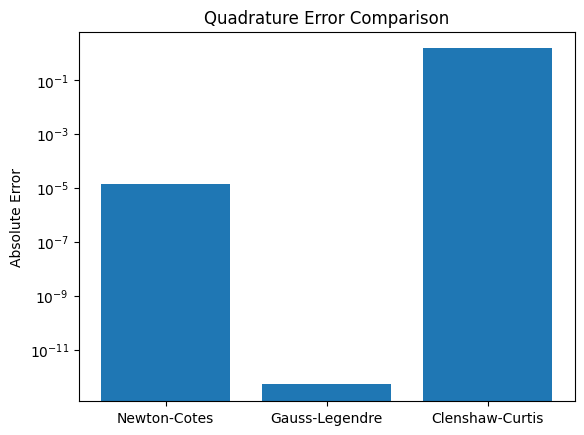

In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Define the function to integrate
f = lambda x: np.exp(-x**2)  # Gaussian function

# Define the integration interval
a, b = -1, 1

# Number of points for comparison
n = 10

# Newton-Cotes quadrature (using a uniform grid)
x_nc = np.linspace(a, b, n)
w_nc, _ = spi.newton_cotes(n - 1)
int_nc = (b - a) * np.dot(w_nc, f(x_nc)) / (n - 1)

# Gauss-Legendre quadrature
x_gl, w_gl = np.polynomial.legendre.leggauss(n)
int_gl = np.dot(w_gl, f((b - a) / 2 * x_gl + (a + b) / 2)) * (b - a) / 2

# Clenshaw-Curtis quadrature (using Chebyshev nodes)
x_cc = np.cos(np.linspace(0, np.pi, n)) * (b - a) / 2 + (a + b) / 2
w_cc = np.array([spi.quad(lambda x: np.prod(x - x_cc[np.arange(n) != i]), a, b)[0] for i in range(n)])
int_cc = np.dot(w_cc, f(x_cc))

# Compute the reference integral
int_exact, _ = spi.quad(f, a, b)

# Print results
print(f"Exact Integral: {int_exact:.6f}")
print(f"Newton-Cotes Approximation: {int_nc:.6f}")
print(f"Gauss-Legendre Approximation: {int_gl:.6f}")
print(f"Clenshaw-Curtis Approximation: {int_cc:.6f}")

# Error comparison
errors = {
    "Newton-Cotes": abs(int_nc - int_exact),
    "Gauss-Legendre": abs(int_gl - int_exact),
    "Clenshaw-Curtis": abs(int_cc - int_exact)
}

plt.bar(errors.keys(), errors.values())
plt.yscale('log')
plt.ylabel("Absolute Error")
plt.title("Quadrature Error Comparison")
plt.show()